In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv 

In [110]:
x = pd.read_csv("fre.csv", header = None, usecols = [0], sep = ",")

In [111]:
y = pd.read_csv("fre.csv", header = None, usecols = [1], sep = ",")

In [112]:
print(x)

           0
0  -0.980130
1   0.483781
2  -0.941449
3   0.973819
4  -0.458339
5   0.201170
6  -0.864212
7   0.327705
8   0.203920
9  -0.848383
10  0.316746
11  0.473342
12 -0.871349
13  0.980172
14 -0.796166
15  0.238025
16  0.589273
17  0.098470
18 -0.616752
19  0.999291
20 -0.563571
21 -0.213880
22  0.689534
23 -0.995415
24  0.592746


In [113]:
print(y)

           1
0  -0.198358
1   0.875189
2  -0.337155
3  -0.227326
4   0.888778
5  -0.979556
6   0.503128
7  -0.944780
8   0.978988
9  -0.529384
10  0.948511
11 -0.880879
12  0.490664
13  0.198151
14  0.605078
15  0.971259
16 -0.807934
17  0.995140
18 -0.787158
19  0.037660
20 -0.826068
21  0.976860
22 -0.724253
23  0.095655
24 -0.805389


In [114]:
k = 3

In [115]:
centers = np.array([[1, 0],[np.cos(np.pi * 2/3),np.sin(np.pi * 2/3)],[np.cos(-np.pi * 2/3),np.sin(-np.pi * 2/3)]])

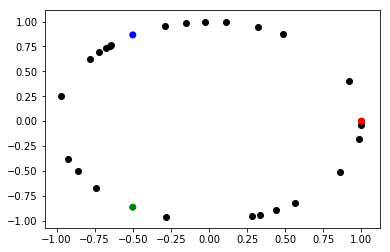

In [63]:
fig, ax = plt.subplots()
ax.scatter(x, y,c="black")
ax.scatter(centers[:,0],centers[:,1],color=["r","b","g"])
plt.savefig('hoge.png')

In [116]:
N = np.c_[x,y]

In [65]:
idx = np.zeros(N.shape[0])

In [66]:
for i in range(N.shape[0]):
        idx[i] = np.argmin(np.sum((N[i,:] - centers)**2,axis=1))

In [71]:
for k in range(k):
    centers[k,:] = N[idx==k,:].mean(axis=0)

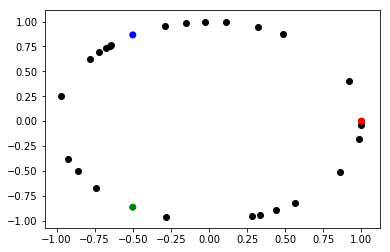

In [72]:
fig, ax = plt.subplots()
ax.scatter(x, y,c="black")
ax.scatter(centers[:,0],centers[:,1],color=["r","b","g"])

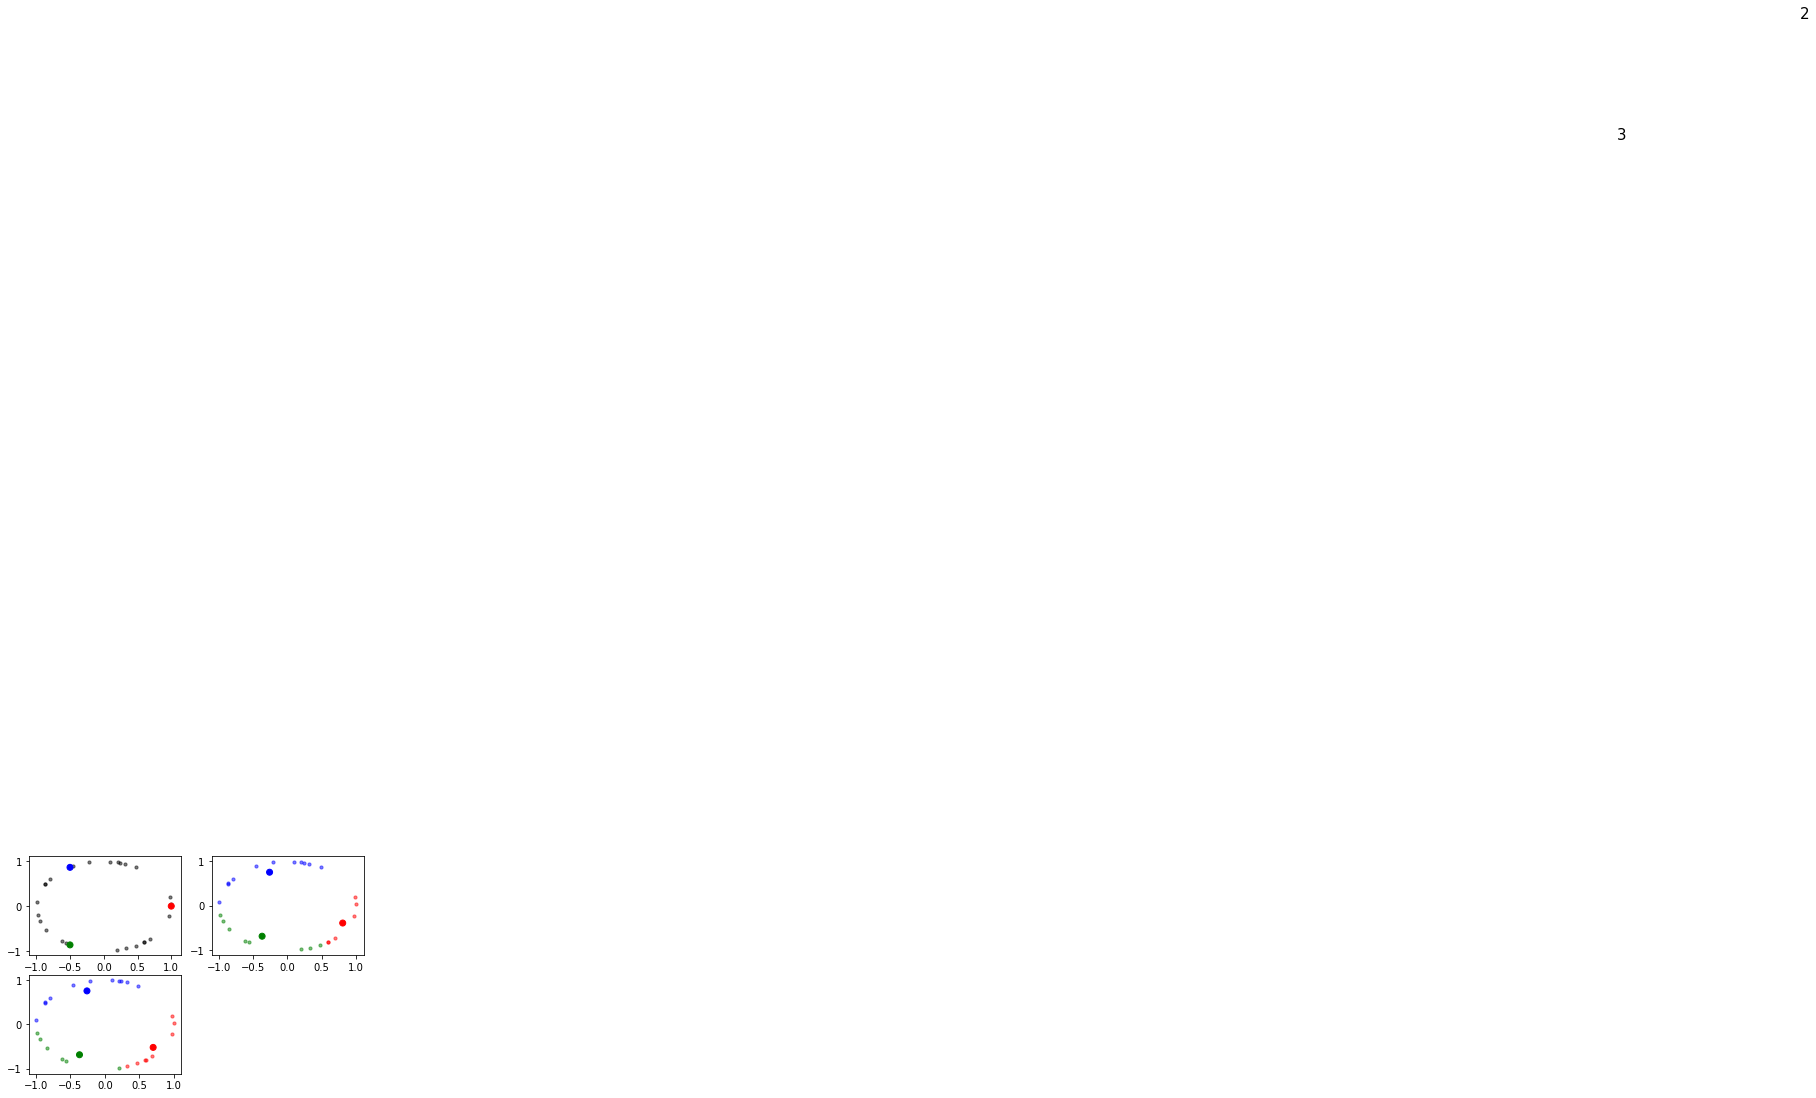

In [120]:
idx = np.zeros(N.shape[0])
centers = np.array([[1, 0],[np.cos(np.pi * 2/3),np.sin(np.pi * 2/3)],[np.cos(-np.pi * 2/3),np.sin(-np.pi * 2/3)]])
plt.subplot(2, 2, 1)
plt.scatter(N[:,0],N[:,1],c="black",s=10,alpha=0.5)
plt.scatter(centers[:,0],centers[:,1],color=["r","b","g"])

for j in np.arange(1,3):
    for i in range(N.shape[0]):
        idx[i] = np.argmin(np.sum((N[i,:] - centers)**2,axis=1))
        
    for k in range(k):
        centers[k,:] = N[idx==k,:].mean(axis=0)
        
    plt.subplot(2, 2, j+1)
    plt.scatter(N[idx==0,0],N[idx==0,1],color="r",s=10,alpha=0.5)
    plt.scatter(N[idx==1,0],N[idx==1,1],color="b",s=10,alpha=0.5)
    plt.scatter(N[idx==2,0],N[idx==2,1],color="g",s=10,alpha=0.5)
    plt.text(x=22,y=20,s=str(j+1),size=15)
    plt.scatter(centers[:,0],centers[:,1],color=["r","b","g"])

plt.show()

In [121]:
def kmeans(N,k,centers,iter):
    
    idx = np.zeros(N.shape[0])
    for _ in range(iter):

        for i in range(N.shape[0]):
            idx[i] = np.argmin(np.sum((N[i,:] - centers)**2,axis=1))
        
        for k in range(k):
            Nav = N[idx==k,:].mean(axis=0)
            dis = np.linalg.norm(Nav)
        centers[k,:] = [Nav[0] / dis, Nav[1] / dis]
    return idx

In [122]:
kmeans(N, 3, centers, 10)

array([2., 1., 2., 0., 1., 0., 1., 0., 1., 2., 1., 0., 1., 0., 1., 1., 0.,
       1., 2., 0., 2., 1., 0., 2., 0.])

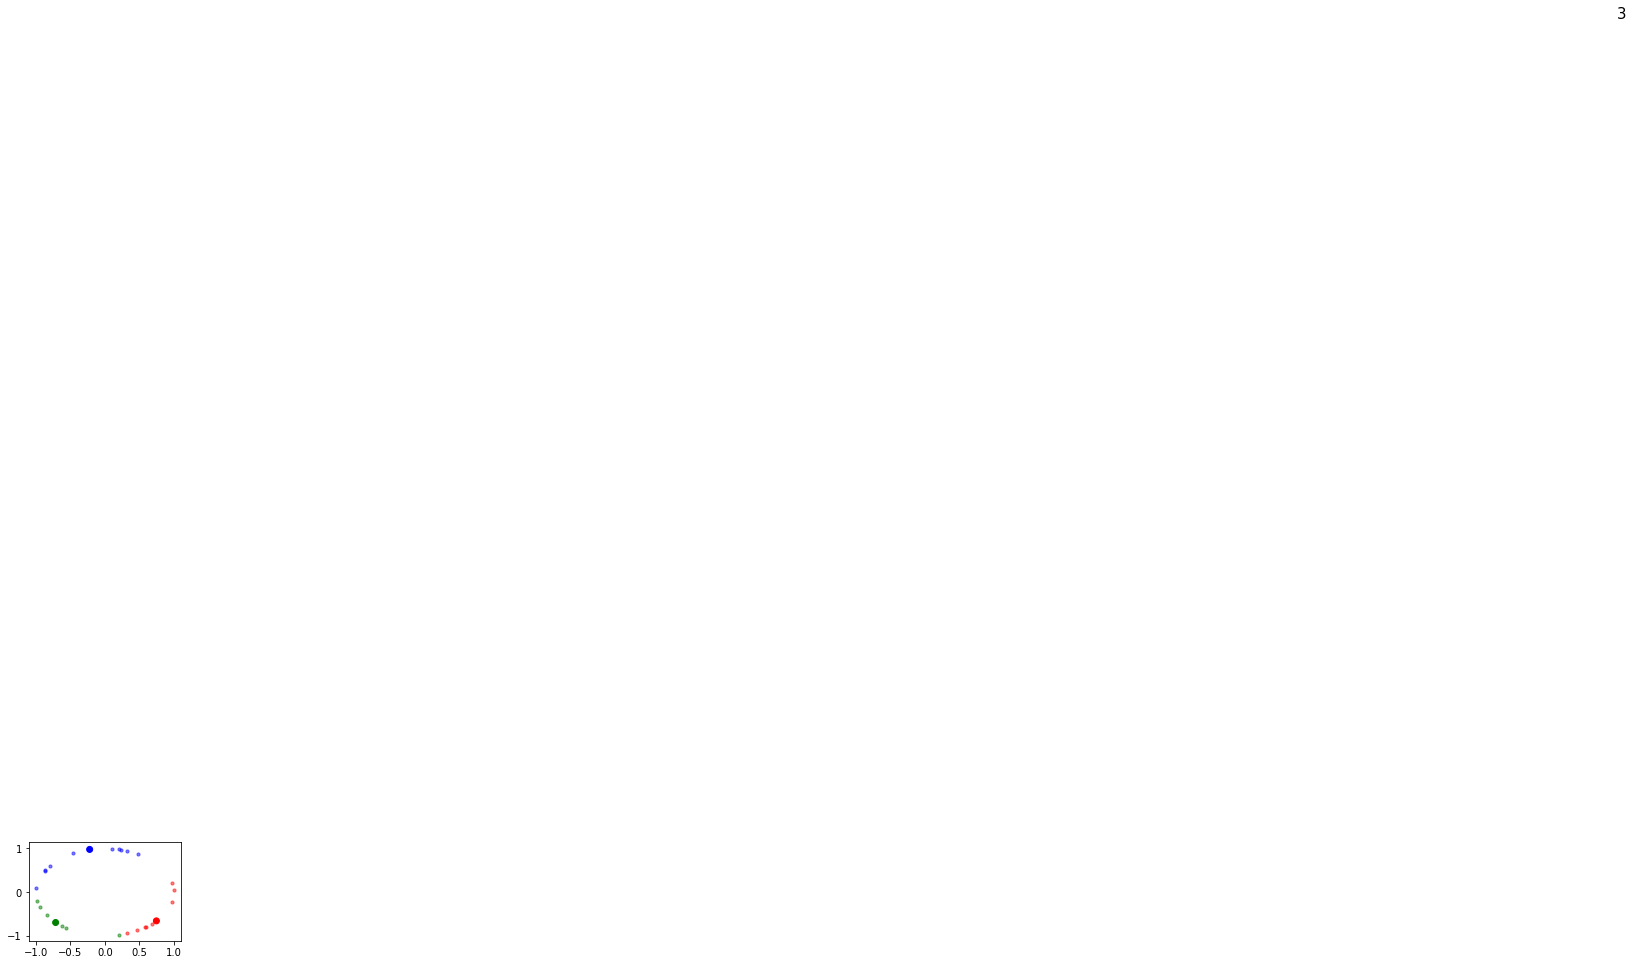

In [124]:
    plt.subplot(2, 2, j+1)
    plt.scatter(N[idx==0,0],N[idx==0,1],color="r",s=10,alpha=0.5)
    plt.scatter(N[idx==1,0],N[idx==1,1],color="b",s=10,alpha=0.5)
    plt.scatter(N[idx==2,0],N[idx==2,1],color="g",s=10,alpha=0.5)
    plt.text(x=22,y=20,s=str(j+1),size=15)
    plt.scatter(centers[:,0],centers[:,1],color=["r","b","g"])
    plt.savefig('hoge.png')
plt.show()